In [583]:
# Nama    : Kevin Prayoga Abdinegara
# NIM     : 18221141
# Jurusan : STI-G
# Kelas   : K01
# Dosen   : Dimitri Mahayana

In [584]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import scipy.stats as st
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [585]:
df = pd.read_excel('18221141.xlsx')
df

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,20.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bandung,1500%,Ya,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pria,21.0,SMA,Pelajar / Mahasiswa,Rp 2 juta – Rp 5 juta,Bandung,800%,Sama saja,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,54.0,D3,Karyawan Swasta,> Rp 10 juta,Kab Bogor,NaN,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
3,Wanita,30.0,D3,Pegawai Negeri,Rp 2 juta – Rp 5 juta,Semarang,800%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,61.0,D3,Wiraswasta,> Rp 10 juta,Bekasi,NaN,Sama saja,NaN,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Pria,48.0,SMA,Pengusaha,> Rp 10 juta,Medan,500%,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,Wanita,45.0,S1,Ibu rumah tangga,Rp 5 juta – Rp 10 juta,Jakarta,NaN,Sama saja,Streaming video/ film,NaN,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
297,Pria,19.0,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,NaN,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN
298,Wanita,30.0,D4,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Bekasi,NaN,Ya,Mengikuti kelas olahraga secara online,Mobile Banking,...,NaN,Kartu Kredit / Debit Online,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN


In [586]:
pd.DataFrame((df.columns)).to_excel('col.xlsx')

# Nomor 1

<AxesSubplot: ylabel='Jenis Kelamin'>

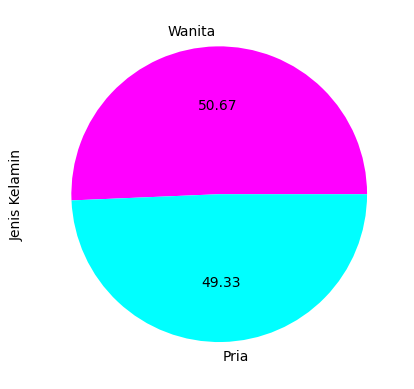

In [587]:
# 1. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi jenis kelamin responden.
color = {'cyan', 'magenta'}
df['Jenis Kelamin'].value_counts().plot(kind='pie', autopct='%.2f', colors=color)

# Nomor 2

In [588]:
# 2. Buat tabel frekuensi dan proporsi untuk jenis kelamin responden
dfgender = df['Jenis Kelamin'].value_counts()
dfgender_pc = (df['Jenis Kelamin'].value_counts()/len(df))
dfgender_tabel = pd.concat([dfgender, dfgender_pc], axis = 1)
dfgender_tabel.columns = ['Frekuensi', 'Proporsi']
dfgender_tabel.index.name = 'Jenis Kelamin'
dfgender_tabel

,Frekuensi,Proporsi
Jenis Kelamin,,
Wanita,151,0.503333
Pria,147,0.490000


# Nomor 3

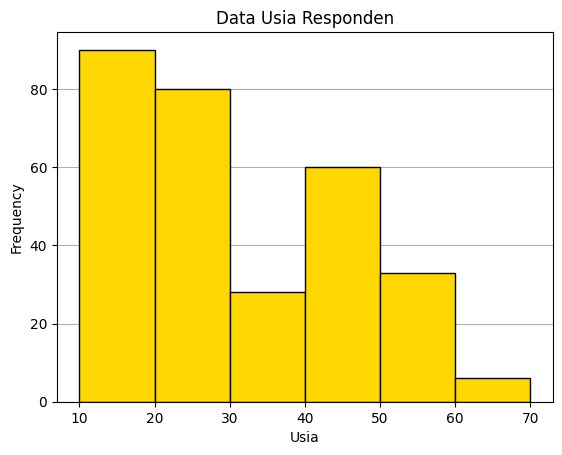

In [589]:
# 3. Buat histogram untuk data umur responden
dfusia = df.loc[(df['Usia'] <= 100)]
graph = dfusia['Usia'].plot(kind='hist', bins=(10, 20, 30, 40, 50, 60, 70), title='Data Usia Responden', edgecolor='black', color='gold')
graph.set_axisbelow(True)

plt.xlabel('Usia')
plt.grid(axis='y')

# Nomor 4

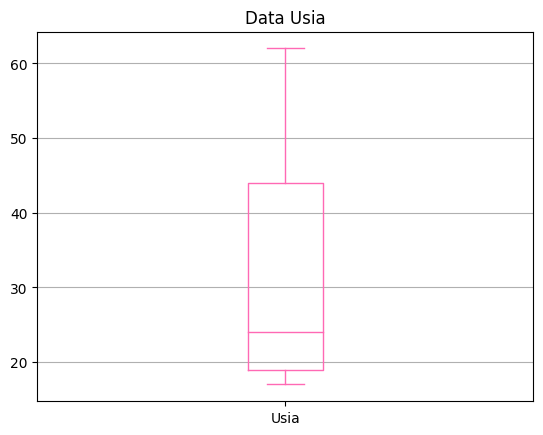

In [590]:
# 4. Buat boxplot untuk data umur responden.
graph1 = dfusia['Usia'].plot(kind = 'box', title = 'Data Usia', color='hotpink')

plt.grid(axis = 'y')

# Nomor 5

In [591]:
# 5. Identifikasi nilai mean, Q1, Q2/median, Q3, min, max dari data umur responden.
print(dfusia['Usia'].describe())

count    297.000000
mean      31.006734
std       13.347485
min       17.000000
25%       19.000000
50%       24.000000
75%       44.000000
max       62.000000
Name: Usia, dtype: float64


# Nomor 6

In [592]:
# 6. Apakah terdapat outlier pada data umur responden. (Definisi outlier : < Q1 – 1.5 IQR atau > Q3 + 1.5 IQR; IQR = Q3 – Q1)
q1 = py.percentile(dfusia['Usia'], 25)
q3 = py.percentile(dfusia['Usia'], 75)
iqr = q3 - q1

dfusia_outlier = dfusia.loc[(dfusia['Usia'] < q1 - 1.5*iqr) | (dfusia['Usia'] > q3 + 1.5*iqr)] 

if (len(dfusia_outlier) == 0):
    print('Tidak terdapat data outlier')
else:
    dfusia_outlier['Usia']

Tidak terdapat data outlier


# Nomor 7

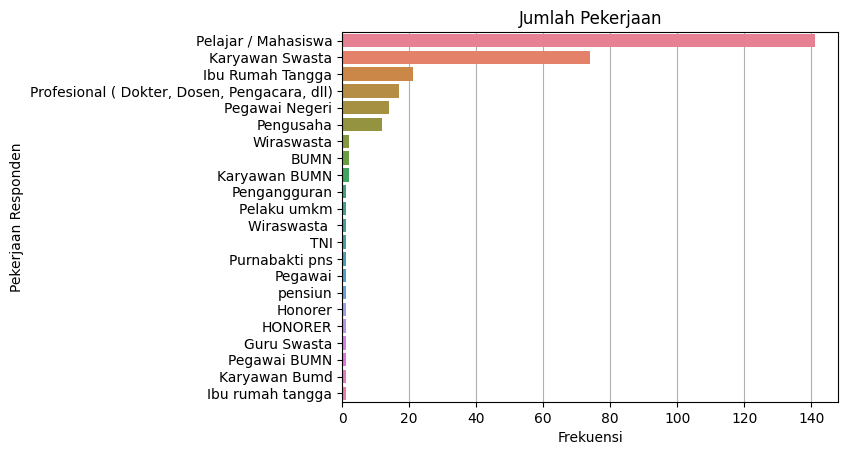

In [593]:
# 7. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi profesi responden.
df_pf = (df.iloc[:, 3:4]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
df_pf = df_pf.reset_index(name='Frekuensi').set_index('index')
df_pf['Proporsi'] = df_pf['Frekuensi']/len(df)
df_pf.index.name = 'Pekerjaan Responden'

bar = sns.barplot(df_pf, x=df_pf['Frekuensi'], y=df_pf.index, palette='husl')
bar.set_title('Jumlah Pekerjaan')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 8

In [594]:
# 8. Buat tabel frekuensi dan proporsi untuk profesi responden
df_pf

,Frekuensi,Proporsi
Pekerjaan Responden,,
Pelajar / Mahasiswa,141,0.470000
Karyawan Swasta,74,0.246667
Ibu Rumah Tangga,21,0.070000
"Profesional ( Dokter, Dosen, Pengacara, dll)",17,0.056667
Pegawai Negeri,14,0.046667
Pengusaha,12,0.040000
Wiraswasta,2,0.006667
BUMN,2,0.006667
Karyawan BUMN,2,0.006667


# Nomor 9

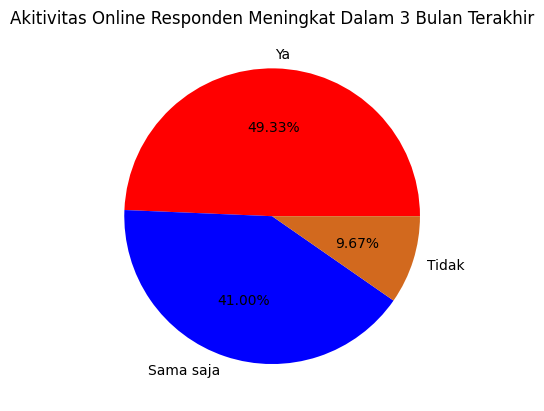

In [595]:
# 9. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi 
# untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.
dfAKT = (df.iloc[:, 7:8]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfAKT = dfAKT.reset_index(name='Frekuensi').set_index('index')
dfAKT['Proporsi'] = dfAKT['Frekuensi']/len(df)
dfAKT.index.name = 'Aktivitas Online Meningkat'

plt.pie(dfAKT['Proporsi'], labels = dfAKT.index,autopct='%.2f%%', colors=['red','blue', 'chocolate'])
plt.title('Akitivitas Online Responden Meningkat Dalam 3 Bulan Terakhir')
plt.show()

# Nomor 10

In [596]:
# 10. Buat tabel frekuensi dan proporsi untuk apakah aktivitas online responden meningkat atau tidak dalam 3 bulan terakhir.
dfAKT

,Frekuensi,Proporsi
Aktivitas Online Meningkat,,
Ya,148,0.493333
Sama saja,123,0.410000
Tidak,29,0.096667


# Nomor 11

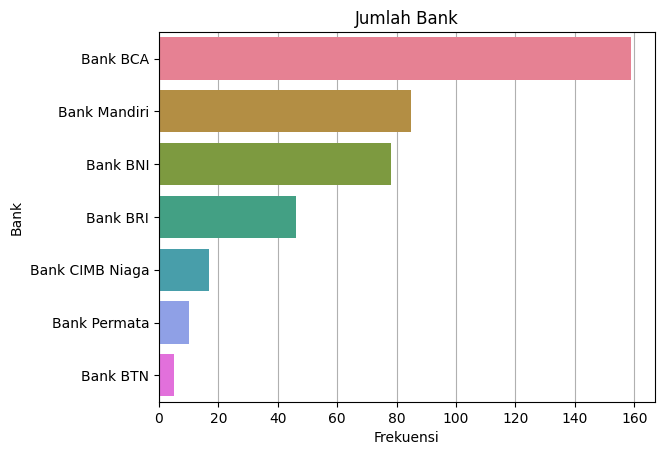

In [597]:
# 11. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7
df_bank = (df.iloc[:, 15:22]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending= False)
df_bank = df_bank.reset_index(name='Frekuensi').set_index('index')
df_bank['Proporsi'] = df_bank['Frekuensi']/len(df)
df_bank.index.name = 'Bank'

bar = sns.barplot(df_bank, x=df_bank['Frekuensi'], y=df_bank.index, palette='husl')
bar.set_title('Jumlah Bank')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 12

In [598]:
# 12. Buat tabel frekuensi dan proporsi pengguna 7 bank yang ada di kolom bank_1 sampai bank_7.
df_bank

,Frekuensi,Proporsi
Bank,,
Bank BCA,159.0,0.530000
Bank Mandiri,85.0,0.283333
Bank BNI,78.0,0.260000
Bank BRI,46.0,0.153333
Bank CIMB Niaga,17.0,0.056667
Bank Permata,10.0,0.033333
Bank BTN,5.0,0.016667


# Nomor 13

In [599]:
# 13. Hitung confidence interval 95% untuk proporsi pengguna Bank BCA: 
# . . < Pbca <..
z_alpha_per2_13 = norm.ppf(1-(2.5/100))
prop_bca = df_bank.loc['Bank BCA', 'Proporsi']
n_bank = len(df)

error_bca = z_alpha_per2_13 * (prop_bca*(1-prop_bca)/n_bank)**(0.5)

print(round(prop_bca - error_bca, 5), '< p bca <', round(prop_bca + error_bca, 5))

0.47352 < p bca < 0.58648


# Nomor 14

In [600]:
# 14. Lakukan uji hipotesis berikut:

# H0: Pbca = 0.5
# H1: Pbca ≠ 0.5
# alpha = 5%
p0_bca = 0.5
z_alpha_per2_14 = norm.ppf(1-(2.5/100))

print('critical region = { z >', z_alpha_per2_14, '} U { z <', -z_alpha_per2_14, '}')

z_14 = n_bank * (prop_bca - p0_bca) / (n_bank * p0_bca * (1-p0_bca))**(0.5)

print('z =', z_14)
if (z_14 > z_alpha_per2_14 or z_14 < -z_alpha_per2_14):
    print('Kesimpulan: H0 berhasil ditolak.')
else:
    print('Kesimpulan: H0 gagal ditolak.')

critical region = { z > 1.959963984540054 } U { z < -1.959963984540054 }
z = 1.0392304845413272
Kesimpulan: H0 gagal ditolak.


# Nomor 15

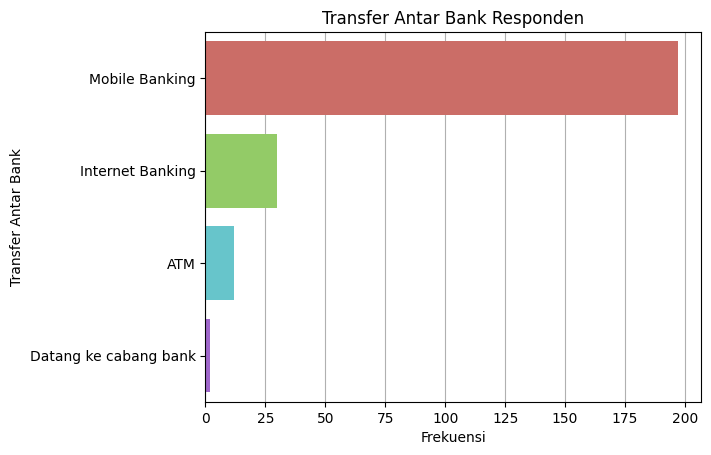

In [601]:
# 15. Buat bar chart yang menunjukkan perbedaan frekuensi / proporsi untuk preferensi channel
# yang dipilih responden untuk melakukan “Transfer antar bank”.
dfTRF = (df.iloc[:, 30:31]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfTRF = dfTRF.reset_index(name='Frekuensi').set_index('index')
dfTRF['Proporsi'] = dfTRF['Frekuensi']/len(df)
dfTRF.index.name = 'Transfer Antar Bank'

bar = sns.barplot(dfTRF, x=dfTRF['Frekuensi'], y=dfTRF.index, palette='hls')
bar.set_title('Transfer Antar Bank Responden')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 16

In [602]:
# 16. Buat tabel frekuensi dan proporsi untuk preferensi channel yang dipilih responden untuk melakukan “Transfer antar bank”.
dfTRF

,Frekuensi,Proporsi
Transfer Antar Bank,,
Mobile Banking,197,0.656667
Internet Banking,30,0.100000
ATM,12,0.040000
Datang ke cabang bank,2,0.006667


# Nomor 17

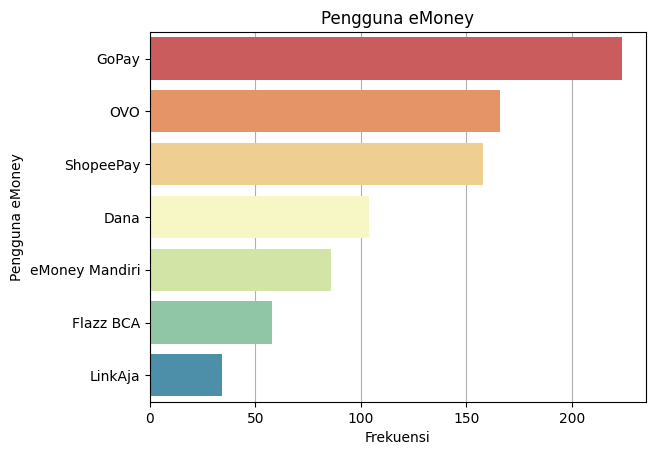

In [603]:
# 17. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 emoney yang ada
# di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)
dfEMO = (df.iloc[:, 37:44]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfEMO = dfEMO.reset_index(name='Frekuensi').set_index('index')
dfEMO['Proporsi'] = dfEMO['Frekuensi']/len(df)
dfEMO.index.name = 'Pengguna eMoney'

bar = sns.barplot(dfEMO, x=dfEMO['Frekuensi'], y=dfEMO.index, palette='Spectral')
bar.set_title('Pengguna eMoney')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 18

In [604]:
# 18. Buat tabel frekuensi dan proporsi pengguna 7 emoney yang ada
# di kolom emoney_pilihan_1 sampai emoney_pilihan_7 (8 – 11 tidak usah)
dfEMO

,Frekuensi,Proporsi
Pengguna eMoney,,
GoPay,224.0,0.746667
OVO,166.0,0.553333
ShopeePay,158.0,0.526667
Dana,104.0,0.346667
eMoney Mandiri,86.0,0.286667
Flazz BCA,58.0,0.193333
LinkAja,34.0,0.113333


# Nomor 19

In [605]:
# 19. Hitung confidence interval 95% untuk selisih proporsi pengguna Gopay dan OVO.

# . . < Pgopay − Povo <..
z_alpha_per2_19 = norm.ppf(1-(2.5/100))
p_gopay = dfEMO.loc['GoPay', 'Proporsi']
p_ovo = dfEMO.loc['OVO', 'Proporsi']
gopay_min_ovo = p_gopay - p_ovo

n_emoney = len(df)

error_gopay_ovo = z_alpha_per2_19 * ((p_gopay*(1-p_gopay)/n_emoney)+(p_ovo*(1-p_ovo)/n_emoney))**(0.5)

print(round(gopay_min_ovo - error_gopay_ovo, 5), '< (p gopay - p ovo) <', round(gopay_min_ovo + error_gopay_ovo, 5))

0.11859 < (p gopay - p ovo) < 0.26808


# Nomor 20

In [606]:
# 20. Lakukan uji hipotesis berikut:

# H0: Pgopay = Povo
# H1: Pgopay > Povo
# alpha = 5%
z_alpha_per2_20 = norm.ppf(1-(5/100))
x_gopay = dfEMO.loc['GoPay', 'Frekuensi']
x_ovo = dfEMO.loc['OVO', 'Frekuensi']
p_hat_no20 = (x_gopay + x_ovo)/(n_emoney*2)

print('Critical region = { z >', z_alpha_per2_20, '}')

z_20 = gopay_min_ovo / (p_hat_no20*(1-p_hat_no20)*(2/n_emoney))**(0.5)

print('z =', z_20)
if (z_20 > z_alpha_per2_20):
    print('Kesimpulan: H0 berhasil ditolak.')
else:
    print('Kesimpulan: H0 gagal ditolak.')

Critical region = { z > 1.6448536269514722 }
z = 4.964341713126591
Kesimpulan: H0 berhasil ditolak.


# Nomor 21

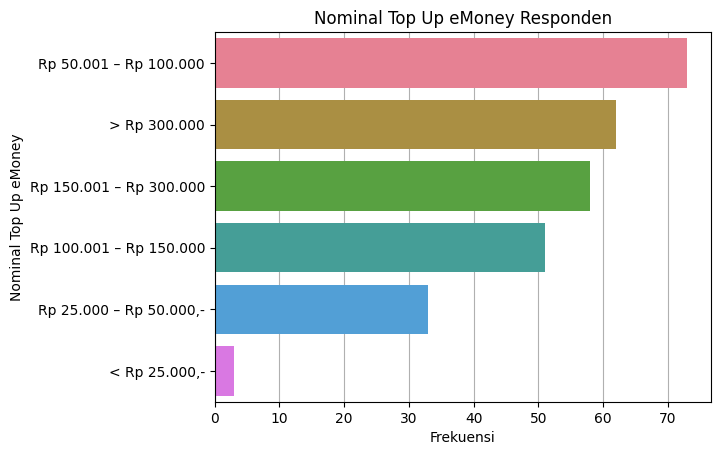

In [607]:
# 21. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk nominal yang biasa dipakai untuk top up emoney.
dfNOM = (df.iloc[:, 70:71]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfNOM = dfNOM.reset_index(name='Frekuensi').set_index('index')
dfNOM['Proporsi'] = dfNOM['Frekuensi']/len(df)
dfNOM.index.name = 'Nominal Top Up eMoney'

bar = sns.barplot(dfNOM, x=dfNOM['Frekuensi'], y=dfNOM.index, palette='husl')
bar.set_title('Nominal Top Up eMoney Responden')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor  22

In [608]:
# 22. Buat tabel frekuensi dan proporsi untuk nominal yang biasa dipakai untuk top up emoney.
dfNOM

,Frekuensi,Proporsi
Nominal Top Up eMoney,,
Rp 50.001 – Rp 100.000,73,0.243333
> Rp 300.000,62,0.206667
Rp 150.001 – Rp 300.000,58,0.193333
Rp 100.001 – Rp 150.000,51,0.170000
"Rp 25.000 – Rp 50.000,-",33,0.110000
"< Rp 25.000,-",3,0.010000


# Nomor 23

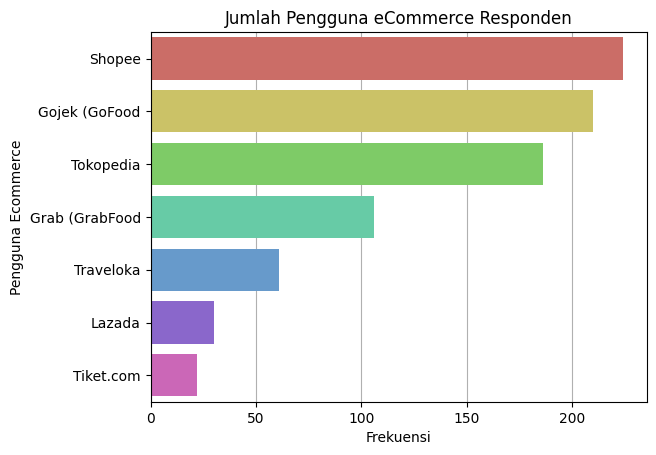

In [609]:
# 23. Buat bar chart yang perbandingan frekuensi/proporsi pengguna 7 ecommerce yang ada di
# kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)
dfECOM = (df.iloc[:, 116:123]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfECOM = dfECOM.reset_index(name='Frekuensi').set_index('index')
dfECOM['Proporsi'] = dfECOM['Frekuensi']/len(df)
dfECOM.index.name = 'Pengguna Ecommerce'

bar = sns.barplot(dfECOM, x=dfECOM['Frekuensi'], y=dfECOM.index, palette='hls')
bar.set_title('Jumlah Pengguna eCommerce Responden')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 24

In [610]:
# 24. Buat tabel frekuensi dan proporsi pengguna 7 ecommerce yang ada di kolom ecommerce_pilihan_1 sampai ecommerce_pilihan_7 (8 – 12 tidak usah)
dfECOM

,Frekuensi,Proporsi
Pengguna Ecommerce,,
Shopee,224.0,0.746667
Gojek (GoFood,210.0,0.700000
Tokopedia,186.0,0.620000
Grab (GrabFood,106.0,0.353333
Traveloka,61.0,0.203333
Lazada,30.0,0.100000
Tiket.com,22.0,0.073333


# Nomor 25

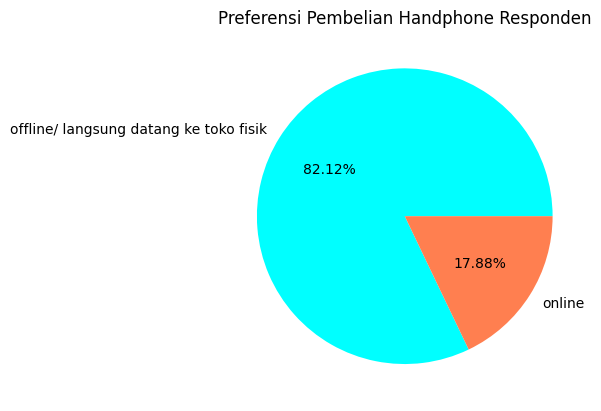

In [611]:
# 25. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi untuk
# responden yang prefer beli handphone secara offline vs online
dfHP = (df.iloc[:, 99:100]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfHP = dfHP.reset_index(name='Frekuensi').set_index('index')
dfHP['Proporsi'] = dfHP['Frekuensi']/len(df)
dfHP.index.name = 'Transfer Antar Bank'

color = ['cyan', 'coral']
plt.pie(dfHP['Proporsi'], labels = dfHP.index,autopct='%.2f%%', normalize=True, colors=color)
plt.title('Preferensi Pembelian Handphone Responden')
plt.show()

# Nomor 26

In [612]:
# 26. Buat tabel frekuensi dan proporsi untuk responden yang prefer beli handphone secara offline vs online
dfHP

,Frekuensi,Proporsi
Transfer Antar Bank,,
offline/ langsung datang ke toko fisik,225,0.750000
online,49,0.163333


# Nomor 27

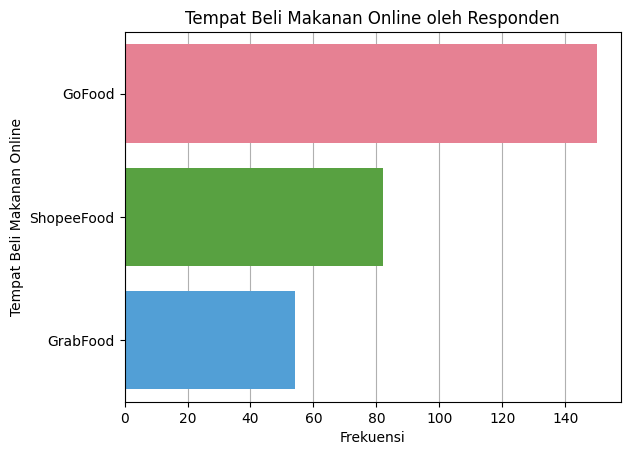

In [613]:
# 27. Buat bar chart / pie chart/ donut chart yang menunjukkan perbedaan frekuensi / proporsi
# untuk tempat beli makanan online yang pilihan responden
dfMKN = (df.iloc[:, 128:129]).apply(pd.Series.value_counts).dropna(how='all').sum(1).sort_values(ascending=False)
dfMKN = dfMKN.reset_index(name='Frekuensi').set_index('index')
dfMKN['Proporsi'] = dfMKN['Frekuensi']/len(df)
dfMKN.index.name = 'Tempat Beli Makanan Online'

dfMKNresp = dfMKN[0:3]
bar = sns.barplot(dfMKNresp, x=dfMKNresp['Frekuensi'], y=dfMKNresp.index, palette='husl')
bar.set_title('Tempat Beli Makanan Online oleh Responden')
bar.set_axisbelow(True)
plt.grid(axis = 'x')
plt.show()

# Nomor 28

In [614]:
# 28. Buat tabel frekuensi dan proporsi untuk tempat beli makanan online yang pilihan responden
dfMKNresp

,Frekuensi,Proporsi
Tempat Beli Makanan Online,,
GoFood,150,0.500000
ShopeeFood,82,0.273333
GrabFood,54,0.180000


# Nomor 29

In [615]:
# 29. Lakukan One Way ANOVA Test berikut:
# H0: Mean umur pengguna gofood = mean umur pengguna grabfood = mean umur
# pengguna shopeefood
# H1: Setidaknya ada dua grup yang memiliki mean umur yang berbeda
# alpha: 5%
df_top3_food = df[(df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'GoFood') 
| (df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'ShopeeFood')  
| (df['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?'] == 'GrabFood')]
df_umur_food = df[['Usia', '50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?']]
df29 = df_umur_food.rename(columns={'50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?': 'Food'})

model = ols('Usia ~ C(Food)', data=df29).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(Food),6.0,7408.943237,1234.823873,6.764783,0.000001
Residual,288.0,52570.683882,182.537097,NaN,NaN


In [616]:
f_alpha = st.f.ppf(0.95, dfn = 6, dfd = 288)
print(f'Crit Region: f > {f_alpha:.2f}')

print('Kesimpulan: f di dalam critical region, H0 berhasil ditolak.')

Crit Region: f > 2.13
Kesimpulan: f di dalam critical region, H0 berhasil ditolak.


# Nomor 30
Tuliskan minimal 5 insights/pelajaran dari hasil pengolahan data responden.
1. Aktivitas responden meningkat hampir 50% dalam 3 bulan terakhir
2. Bank BCA merupakan bank yang paling banyak dipakai oleh pengguna
3. Transfer antar bank mayoritas menggunakan Mobile Banking
4. EMoney yang paling sering digunakan oleh pengguna yaitu GoPay
5. Rata-rata top up eMoney berada di kisaran Rp50.001-RP100.000
6. ECommerce Shopee paling sering digunakan oleh responden
7. Mayoritas responden melakukan pembelian HP secara offline
8. Wadah tempat pembelian makan online yang sering digunakan yaitu GoFood oleh responden